### **The Analysis for human have a heart disease or not**

#Decision Tree
It is Supervised Machine learning Model (Classification and Regression)
* Root node - It Represents my entire dataset
* Splitting - We split the data (Features) into internal nodes(By decision criteria)(Gini impurity,entropy and information gain)
* Leaf node - Terminal node (Target value) (purest form)
* These things goes into a recursion(function call itself until the condition satisfies)
* Predict

In [ ]:
# Import the necessary libraries....
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/heart.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# columns/ Features
* age - Patient age
* Sex - Gender 1 -> Male 0-> Female
* CP -> chest pain
* trestbps -> resting bloog pressure(in mm/hg)
* chol -> blood cholestrol level
* fbs -> Fasting blood sugar
* restecg -> heart activity while resting
* thalach -> Max heart rate while excercise
* exang -> Is there any pain during excercise
* oldpeak -> Electrical activities of heart
* slope -> 0 -> upslope , 1-> flat, 2 -> downslope
* ca -> whether in vessels there are blockage or vessels is being narrow down or not
* Thal -> Thallium test (Permanent damage or healthy heart)
* Target -> Heart disease present or not

## **Cleaning of the data**

In [ ]:
df.shape

(303, 14)

There are 303 rows and 14 columns

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
df['age'].value_counts()

,count
age,
58,19
57,17
54,16
59,14
52,13
51,12
62,11
44,11
56,11


In [ ]:
df['sex'].value_counts()

,count
sex,
1,207
0,96


In [ ]:
df['sex'] = df['sex'].map({0:'female',1:'male'})

In [ ]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,male,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,male,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,female,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,male,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,female,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,female,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,male,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,male,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,male,0,130,131,0,1,115,1,1.2,1,1,3,0


In [ ]:
df['sex'].value_counts()

,count
sex,
male,207
female,96


In [ ]:
df['ca'].value_counts()

,count
ca,
0,175
1,65
2,38
3,20
4,5


In [ ]:
df['chol'].value_counts()

,count
chol,
204,6
234,6
197,6
212,5
269,5
...,...
169,1
187,1
176,1


In [ ]:
df['cp'].value_counts()

,count
cp,
0,143
2,87
1,50
3,23


In [ ]:
df['trestbps'].value_counts()

,count
trestbps,
120,37
130,36
140,32
110,19
150,17
138,13
128,12
125,11
160,11


In [ ]:
df['exang'].value_counts()

,count
exang,
0,204
1,99


In [ ]:
df['fbs'].value_counts()

,count
fbs,
0,258
1,45


In [ ]:
df['oldpeak'].value_counts()

,count
oldpeak,
0.0,99
1.2,17
1.0,14
0.6,14
0.8,13
1.4,13
0.2,12
1.6,11
1.8,10


In [ ]:
df['restecg'].value_counts()

,count
restecg,
1,152
0,147
2,4


In [ ]:
df['slope'].value_counts()

,count
slope,
2,142
1,140
0,21


In [ ]:
df['target'].value_counts()

,count
target,
1,165
0,138


In [ ]:
df['thal'].value_counts()

,count
thal,
2,166
3,117
1,18
0,2


In [ ]:
df['thalach'].value_counts()

,count
thalach,
162,11
163,9
160,9
173,8
152,8
...,...
117,1
71,1
118,1


In [ ]:
df['sex']= df['sex'].map({'female':0,'male':1})

In [ ]:
  df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [ ]:
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


there are no null values

In [ ]:
# check duplicated value
df.duplicated().sum()

np.int64(1)

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.duplicated().sum()

np.int64(0)

there is only one duplicate value

In [ ]:
import plotly.express as px

In [ ]:
for col in df.columns:
  fig=px.box(df,y=col,title=f'checking outliers in <b>{col}<b>')
  fig.show()

# Visulaization and Insights

In [ ]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [ ]:
df[(df['chol']>300) & (df['target']==1)]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
16,58,0,2,120,340,0,1,172,0,0.0,2,0,2,1
25,71,0,1,160,302,0,1,162,0,0.4,2,2,2,1
28,65,0,2,140,417,1,0,157,0,0.8,2,1,2,1
36,54,0,2,135,304,1,1,170,0,0.0,2,0,2,1
39,65,0,2,160,360,0,0,151,0,0.8,2,0,2,1
40,51,0,2,140,308,0,0,142,0,1.5,2,1,2,1
44,39,1,2,140,321,0,0,182,0,0.0,2,0,2,1
45,52,1,1,120,325,0,1,172,0,0.2,2,0,2,1
51,66,1,0,120,302,0,0,151,0,0.4,1,0,2,1


In [ ]:
fig = px.pie(df,names='sex',title='Gender Distribution')
fig.update_layout(height=500,width=700)
fig.show()


In [ ]:

fig = px.histogram(df,x='age',title='<b> Age Distribution <b>',color_discrete_sequence=['lightcoral'])
fig.show()

In [ ]:
fig = px.histogram(df,color='sex',x='target',title='According to sex target distribution',barmode='group')
fig.update_layout(height=500,width=700)
fig.show()


In [ ]:
fig = px.histogram(df,color='sex',x='cp',title='According to sex cp distribution',barmode='group')
fig.update_layout(height=500,width=700)
fig.show()

In [ ]:
fig = px.histogram(df,color='sex',x='fbs',title='According to sex fbs distribution',barmode='group')
fig.update_layout(height=500,width=700)
fig.show()

In [ ]:
fig = px.histogram(df,color='sex',x='restecg',title='According to sex restecg distribution',barmode='group')
fig.update_layout(height=500,width=700)
fig.show()

In [ ]:
fig = px.histogram(df,color='sex',x='exang',title='According to sex exang distribution',barmode='group')
fig.update_layout(height=500,width=700)
fig.show()

In [ ]:
fig = px.histogram(df,color='exang',x='target',title='Heart Diseases According to sex exang distribution',barmode='group')
fig.update_layout(height=500,width=700)
fig.show()

In [ ]:
fig = px.imshow(df.corr(),text_auto=True,color_continuous_scale='teal',aspect='auto')
fig.update_layout(height=500,width=700,font=dict(size=10))
fig.show()

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,302.0,54.420530,9.047970,29.0,48.00,55.5,61.00,77.0
sex,302.0,0.682119,0.466426,0.0,0.00,1.0,1.00,1.0
cp,302.0,0.963576,1.032044,0.0,0.00,1.0,2.00,3.0
trestbps,302.0,131.602649,17.563394,94.0,120.00,130.0,140.00,200.0
chol,302.0,246.500000,51.753489,126.0,211.00,240.5,274.75,564.0
fbs,302.0,0.149007,0.356686,0.0,0.00,0.0,0.00,1.0
restecg,302.0,0.526490,0.526027,0.0,0.00,1.0,1.00,2.0
thalach,302.0,149.569536,22.903527,71.0,133.25,152.5,166.00,202.0
exang,302.0,0.327815,0.470196,0.0,0.00,0.0,1.00,1.0
oldpeak,302.0,1.043046,1.161452,0.0,0.00,0.8,1.60,6.2


In [ ]:
#!pip install ydata-profiling

In [ ]:
#from ydata_profiling import ProfileReport

In [ ]:
#profile = ProfileReport(df,title='Heart Disease Analysis by Akshat',explorative=True)
#profile.to_file('Heart Disease Analysis by Akshat.html')

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x = df.drop('target',axis=1)
y = df['target']

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.7,random_state=42)

In [ ]:
x_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
124,39,0,2,94,199,0,1,179,0,0.0,2,0,2
72,29,1,1,130,204,0,0,202,0,0.0,2,0,2
15,50,0,2,120,219,0,1,158,0,1.6,1,0,2
10,54,1,0,140,239,0,1,160,0,1.2,2,0,2
163,38,1,2,138,175,0,1,173,0,0.0,2,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,41,1,0,110,172,0,0,158,0,0.0,2,0,3
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
271,61,1,3,134,234,0,1,145,0,2.6,1,2,2


In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
DT=DecisionTreeClassifier()

In [ ]:
DT.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
ypred = DT.predict(x_test)

In [ ]:
ypred

array([0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 1])

In [ ]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [ ]:
print('Accuracy Score:',accuracy_score(y_test,ypred)*100)
print('Confusion Matrix:',confusion_matrix(y_test,ypred))
print('Classification Report',classification_report(y_test,ypred))

Accuracy Score: 84.61538461538461
Confusion Matrix: [[36  6]
 [ 8 41]]
Classification Report               precision    recall  f1-score   support

           0       0.82      0.86      0.84        42
           1       0.87      0.84      0.85        49

    accuracy                           0.85        91
   macro avg       0.85      0.85      0.85        91
weighted avg       0.85      0.85      0.85        91



[Text(0.48135964912280704, 0.9444444444444444, 'x[2] <= 0.5\ngini = 0.496\nsamples = 211\nvalue = [96.0, 115.0]'),
 Text(0.24561403508771928, 0.8333333333333334, 'x[11] <= 0.5\ngini = 0.395\nsamples = 96\nvalue = [70, 26]'),
 Text(0.36348684210526316, 0.8888888888888888, 'True  '),
 Text(0.15789473684210525, 0.7222222222222222, 'x[12] <= 2.5\ngini = 0.5\nsamples = 48\nvalue = [24, 24]'),
 Text(0.08771929824561403, 0.6111111111111112, 'x[8] <= 0.5\ngini = 0.384\nsamples = 27\nvalue = [7, 20]'),
 Text(0.03508771929824561, 0.5, 'x[4] <= 316.5\ngini = 0.111\nsamples = 17\nvalue = [1, 16]'),
 Text(0.017543859649122806, 0.3888888888888889, 'gini = 0.0\nsamples = 15\nvalue = [0, 15]'),
 Text(0.05263157894736842, 0.3888888888888889, 'x[10] <= 1.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.03508771929824561, 0.2777777777777778, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.07017543859649122, 0.2777777777777778, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.14035087719298245

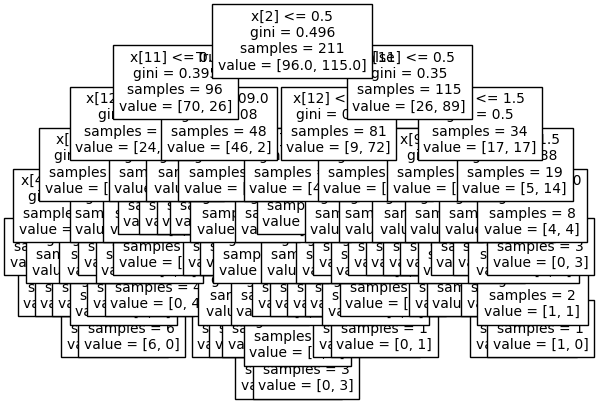

In [ ]:
from sklearn import tree
tree.plot_tree(DT,fontsize=10)

In [ ]:
! pip install graphviz

In [ ]:
import graphviz

In [ ]:
y=y.astype('str')

In [ ]:
classname=y.unique()


In [ ]:
dt = tree.export_graphviz(DT,out_file=None,feature_names=x.columns,filled=True,rounded=True,class_names=classname,special_characters=True)
graph=graphviz.Source(dt)
graph.render('DT')
graph.view('DT')

'DT.pdf'